# Credit Card Fraud Detection - Final Report

### Introduction
### Credit card fraud detection is a crucial task in the financial sector to prevent fraudulent transactions.
### This project explores patterns in fraudulent transactions using exploratory data analysis (EDA).


## Dataset Overview

The dataset consists of credit card transactions, where:
- `Class 0`: Legitimate transactions (~99.83%)
- `Class 1`: Fraudulent transactions (~0.17%)
- Features (`V1` to `V28`) are anonymized PCA components.
- `Amount`: Transaction amount.
- `Time`: Seconds elapsed since the first transaction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/creditcard.csv")
fraud_cases = df['Class'].value_counts(normalize=True) * 100
print(f"Fraud Cases: {fraud_cases}")

Fraud Cases: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [3]:
## Fraud Distribution Over Time

df['Hour'] = df['Time'] // 3600 % 24
hourly_fraud = df[df['Class'] == 1].groupby('Hour')['Amount'].mean()

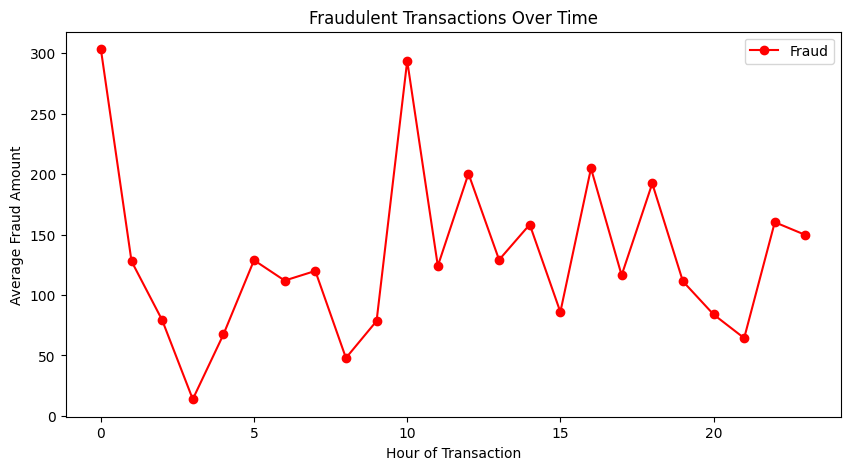

In [4]:
plt.figure(figsize=(10,5))
plt.plot(hourly_fraud, marker='o', linestyle='-', color='red', label='Fraud')
plt.xlabel('Hour of Transaction')
plt.ylabel('Average Fraud Amount')
plt.title('Fraudulent Transactions Over Time')
plt.legend()
plt.show()

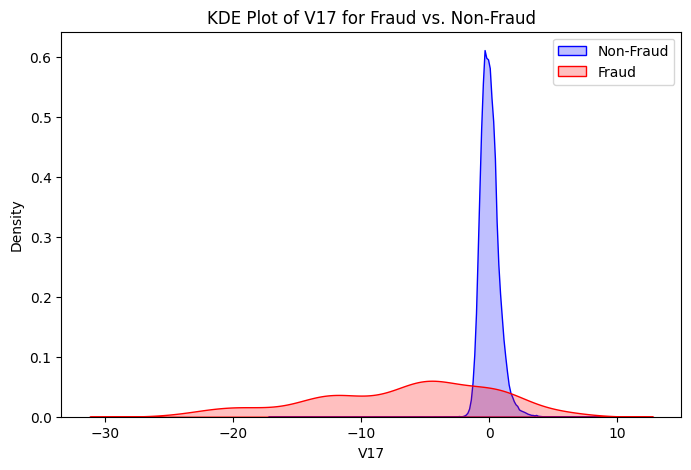

In [6]:
## KDE Plot for Feature V17
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Class']==0]['V17'], label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(df[df['Class']==1]['V17'], label='Fraud', fill=True, color='red')
plt.title("KDE Plot of V17 for Fraud vs. Non-Fraud")
plt.legend()
plt.show()


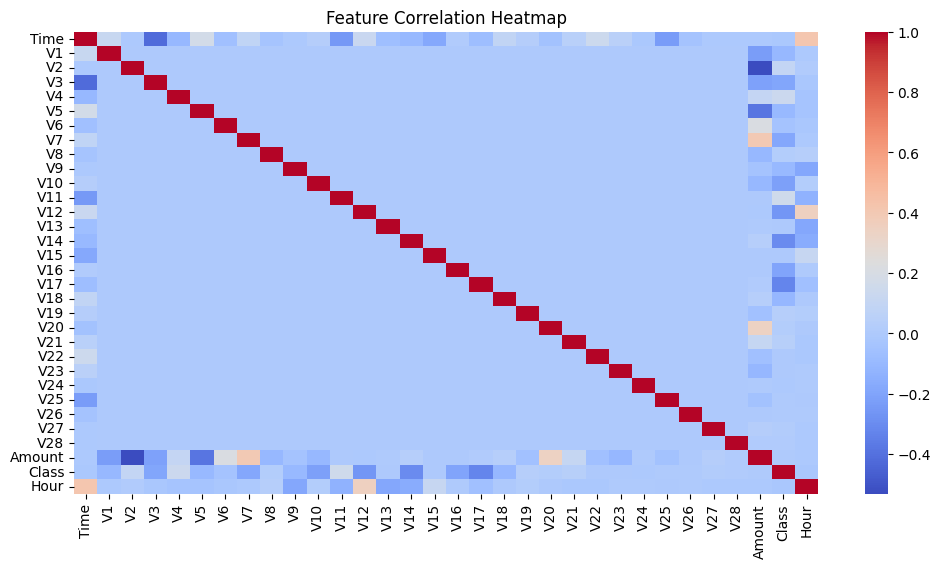

In [7]:
## Correlation Heatmap
plt.figure(figsize=(12,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Key Insights
- Fraud transactions are rare (~0.17% of total transactions).
- Fraud transactions tend to have higher average amounts.
- Certain hours (11, 26) see higher fraud activity.
- Feature V17 shows slight separation for fraud cases.

## Challenges & Limitations
- Highly imbalanced dataset (~99.83% non-fraud).
- Features are anonymized due to PCA transformation.
- Real-world fraud detection would require more contextual features.